In [23]:
from pathlib import Path

import pickle 
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt 
from PIL import Image

DATA_DIR = Path().absolute().parent / "data"

In [3]:
segment_dir = DATA_DIR / "seg100"

with open(segment_dir / "centreline.p", "rb") as f:
    centreline: nx.Graph = pickle.load(f)

In [4]:
centreline.nodes(data=True)

NodeDataView({(97, 237): {}, (100, 227): {}, (107, 240): {}, (113, 240): {}, (119, 240): {}, (125, 240): {}, (132, 240): {}, (139, 241): {}, (145, 242): {}, (151, 242): {}, (156, 243): {}, (161, 244): {}, (167, 246): {}, (172, 247): {}, (178, 249): {}, (182, 252): {}, (184, 257): {}, (187, 251): {}, (190, 251): {}, (193, 252): {}, (196, 253): {}, (199, 254): {}, (201, 256): {}, (203, 258): {}, (205, 260): {}, (207, 262): {}, (210, 264): {}, (212, 266): {}, (214, 268): {}, (216, 271): {}, (218, 274): {}, (220, 277): {}, (222, 280): {}, (224, 282): {}, (226, 284): {}, (228, 286): {}, (231, 287): {}, (233, 289): {}, (236, 289): {}, (239, 289): {}, (242, 289): {}, (245, 289): {}, (248, 290): {}, (186, 260): {}, (188, 263): {}, (190, 266): {}, (192, 269): {}, (193, 272): {}, (193, 275): {}, (193, 278): {}, (194, 281): {}, (196, 283): {}, (198, 286): {}, (200, 289): {}, (202, 291): {}, (204, 294): {}, (206, 297): {}, (208, 300): {}, (211, 302): {}, (100, 218): {}, (97, 211): {}, (92, 205): {

In [5]:
centreline.edges(data=True)

EdgeDataView([((97, 237), (100, 227), {}), ((97, 237), (107, 240), {}), ((100, 227), (100, 218), {}), ((107, 240), (113, 240), {}), ((113, 240), (119, 240), {}), ((119, 240), (125, 240), {}), ((125, 240), (132, 240), {}), ((132, 240), (139, 241), {}), ((139, 241), (145, 242), {}), ((145, 242), (151, 242), {}), ((151, 242), (156, 243), {}), ((156, 243), (161, 244), {}), ((161, 244), (167, 246), {}), ((167, 246), (172, 247), {}), ((172, 247), (178, 249), {}), ((178, 249), (182, 252), {}), ((182, 252), (184, 257), {}), ((182, 252), (187, 251), {}), ((184, 257), (186, 260), {}), ((187, 251), (190, 251), {}), ((190, 251), (193, 252), {}), ((193, 252), (196, 253), {}), ((196, 253), (199, 254), {}), ((199, 254), (201, 256), {}), ((201, 256), (203, 258), {}), ((203, 258), (205, 260), {}), ((205, 260), (207, 262), {}), ((207, 262), (210, 264), {}), ((210, 264), (212, 266), {}), ((212, 266), (214, 268), {}), ((214, 268), (216, 271), {}), ((216, 271), (218, 274), {}), ((218, 274), (220, 277), {})

In [6]:
with open(segment_dir / 'representative_frame.p', 'rb') as f:
    a = pickle.load(f)

In [7]:
a

array([[ 41,  45,  43, ...,  97,  92,  88],
       [ 45,  47,  46, ..., 104,  96,  92],
       [ 46,  48,  48, ..., 106,  98,  93],
       ...,
       [ 31,  35,  37, ...,  76,  66,  56],
       [ 30,  32,  36, ...,  66,  58,  50],
       [ 29,  30,  31, ...,  60,  53,  43]], dtype=uint8)

In [8]:
type(a)

numpy.ndarray

In [9]:
a.shape

(512, 512)

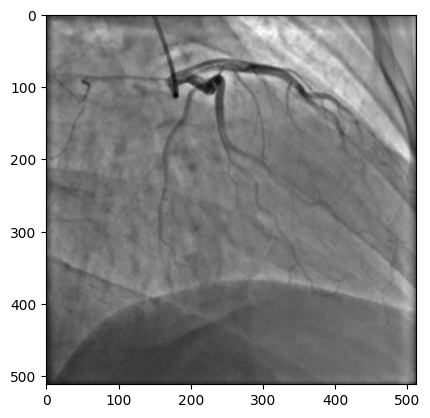

In [12]:
plt.imshow(a, cmap='gray')
plt.show()

In [26]:
nodes = np.array(centreline.nodes)

In [49]:
for (x1, y1), (x2, y2) in centreline.edges:
    print(x1, y1, x2, y2)

131 105 141 113
131 105 122 113
141 113 147 118
122 113 120 120
120 120 116 125
116 125 111 131
111 131 107 138
107 138 106 146
106 146 105 154
105 154 104 161
104 161 104 168
104 168 106 175
106 175 110 180
110 180 117 183
110 180 107 186
117 183 121 187
107 186 107 191
107 191 108 196
108 196 109 201
109 201 111 205
111 205 113 210
113 210 113 214
113 214 114 218
114 218 114 222
114 222 114 226
114 226 114 230
114 230 113 234
113 234 111 238
111 238 108 243
108 243 104 249
104 249 99 255
99 255 94 261
94 261 90 268
90 268 87 276
87 276 85 283
85 283 83 289
83 289 82 295
82 295 82 300
82 300 79 305
82 300 86 305
79 305 78 310
86 305 89 309
89 309 90 313
90 313 92 317
92 317 94 321
94 321 95 324
95 324 96 327
96 327 98 330
98 330 99 334
99 334 100 338
100 338 101 342
101 342 103 346
103 346 105 350
105 350 106 354
106 354 108 358
108 358 110 362
110 362 113 365
113 365 116 366
116 366 119 369
119 369 123 371
123 371 127 374
127 374 130 378
130 378 134 382
134 382 137 386
137 386 140 38

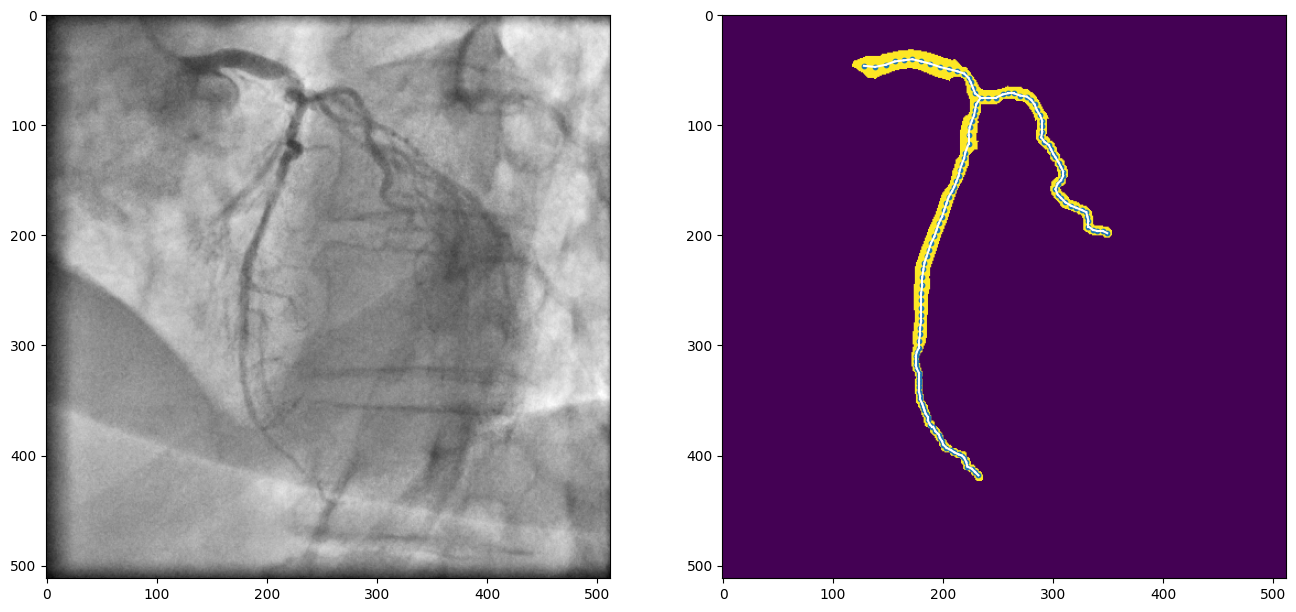

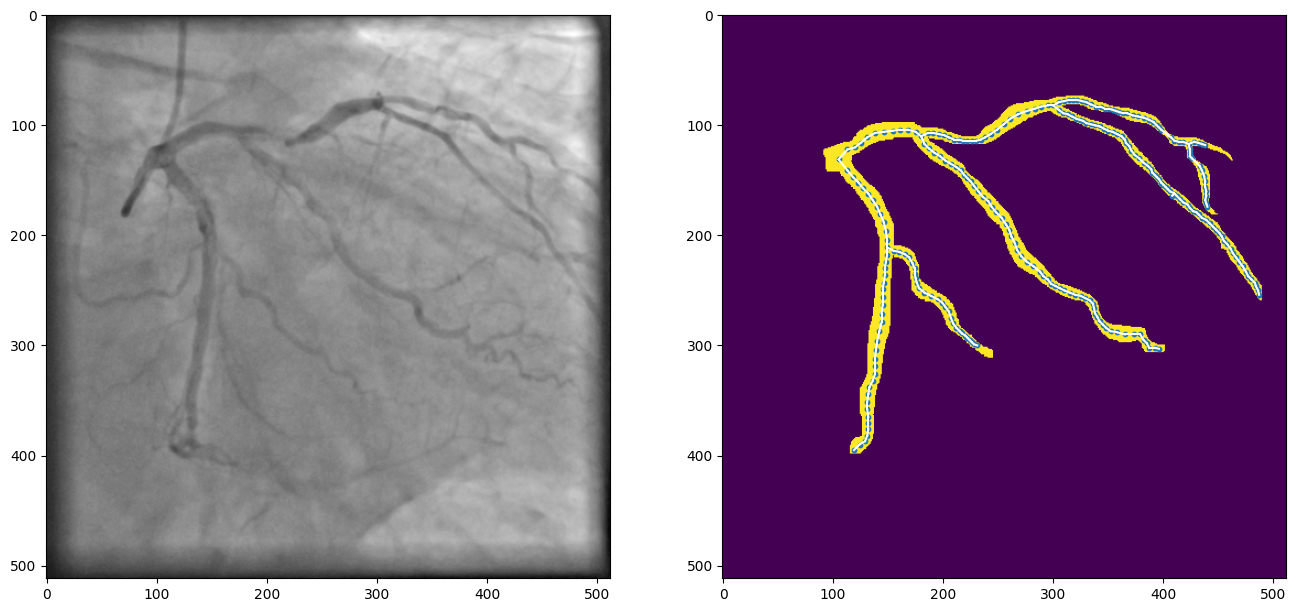

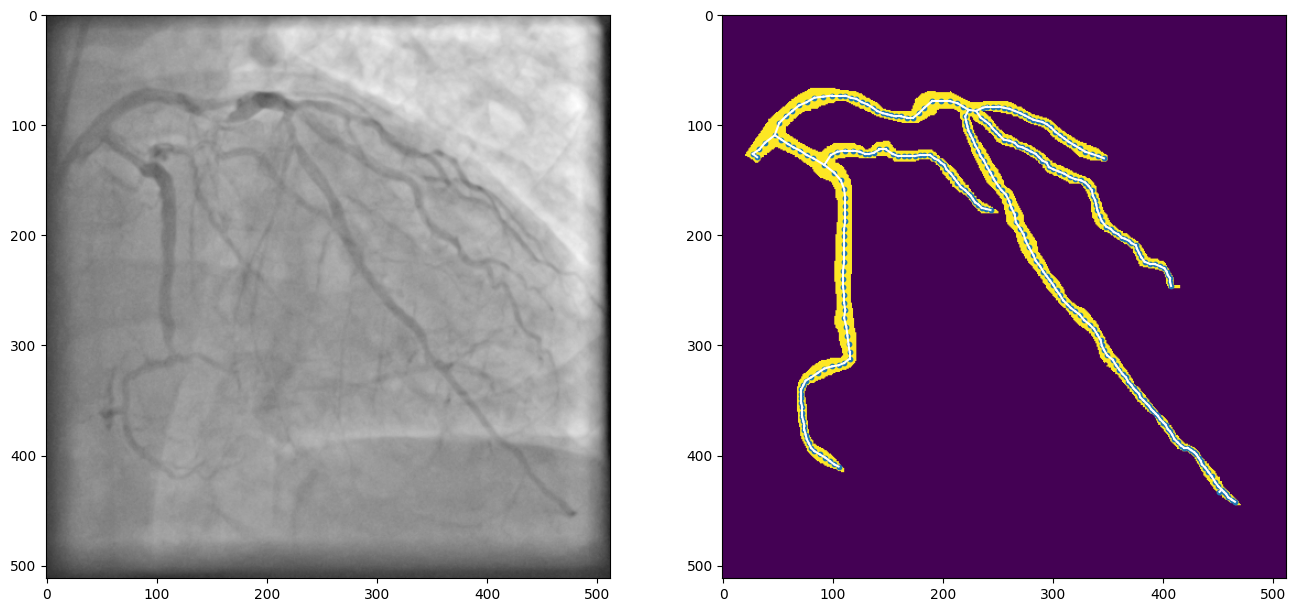

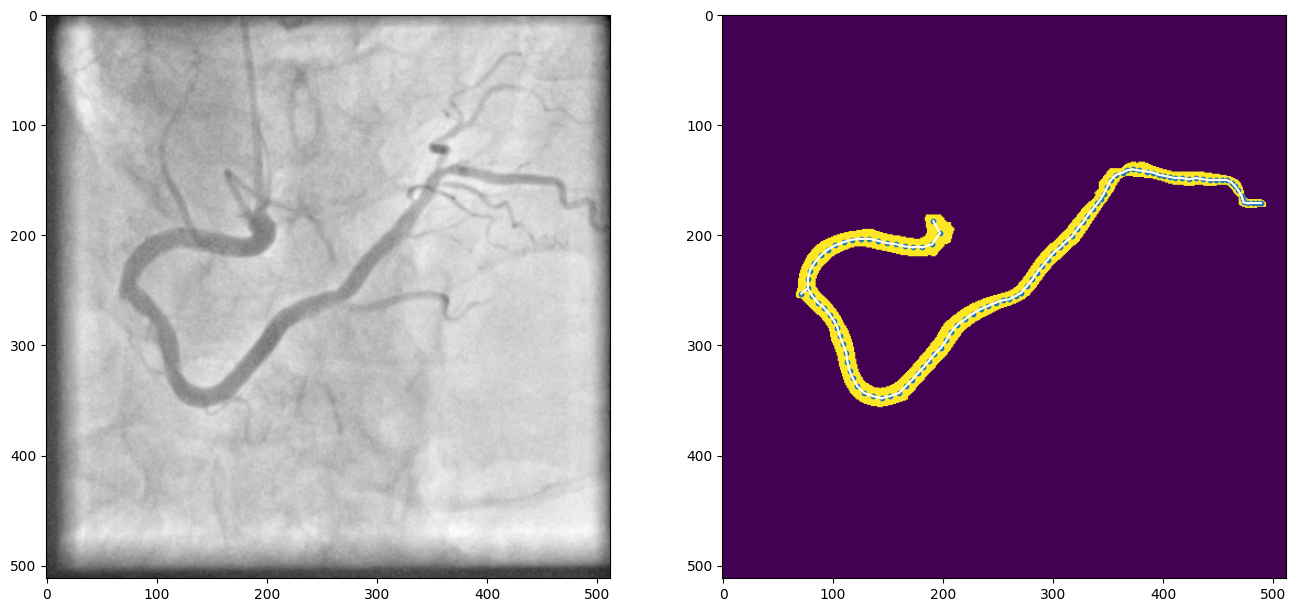

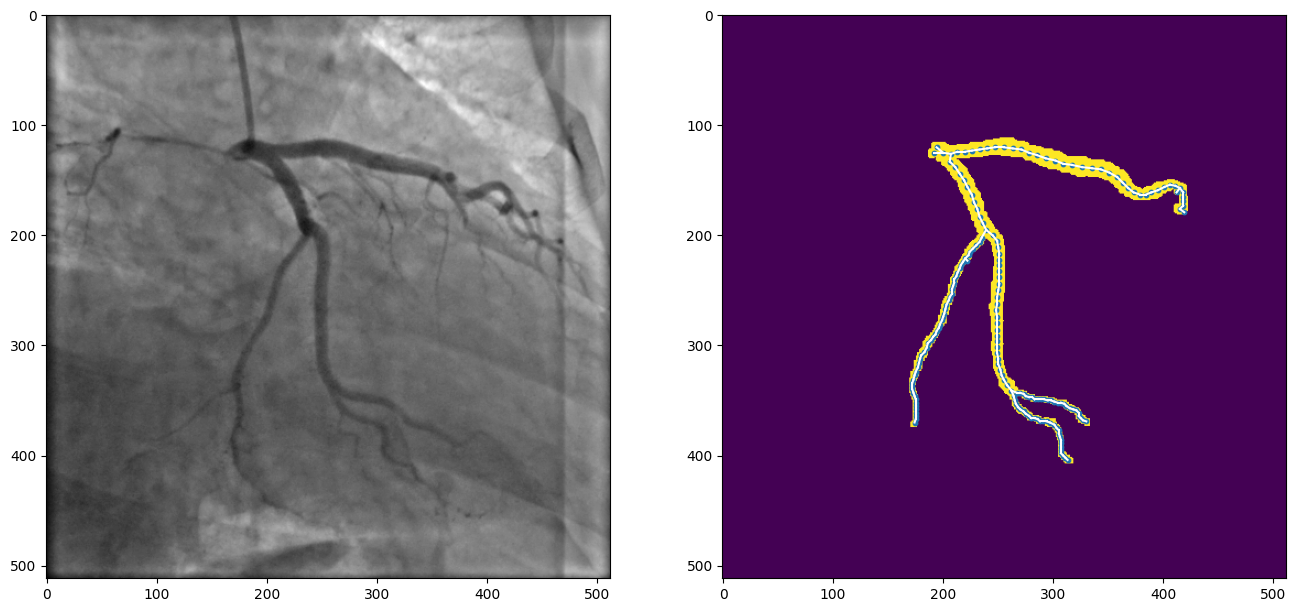

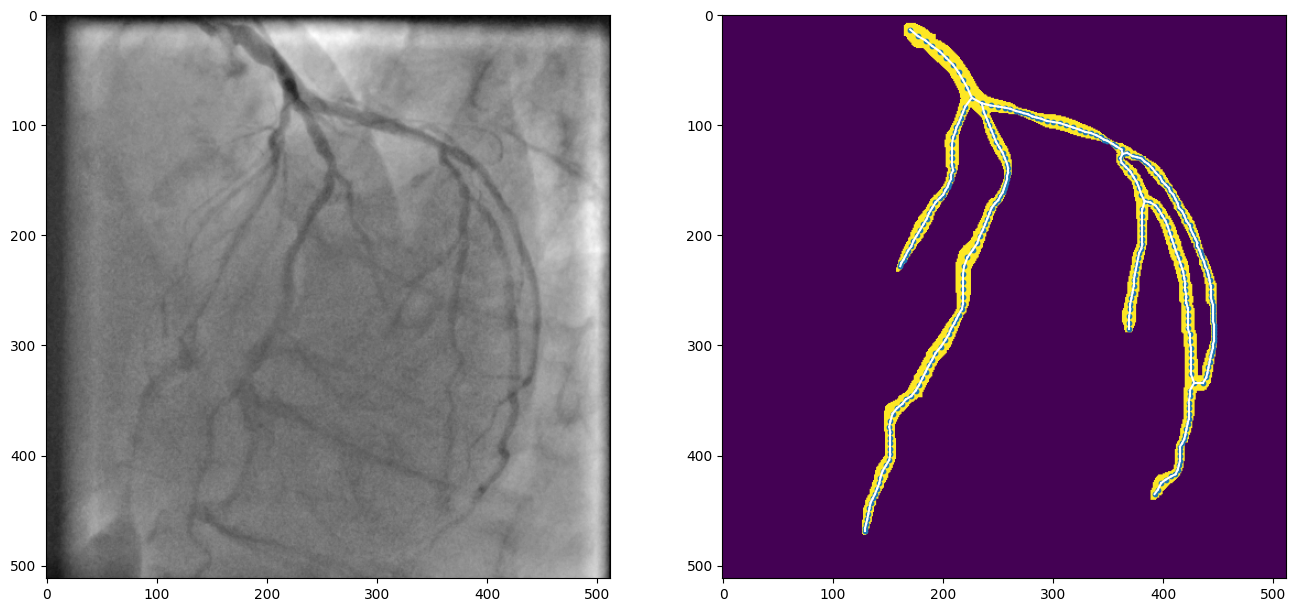

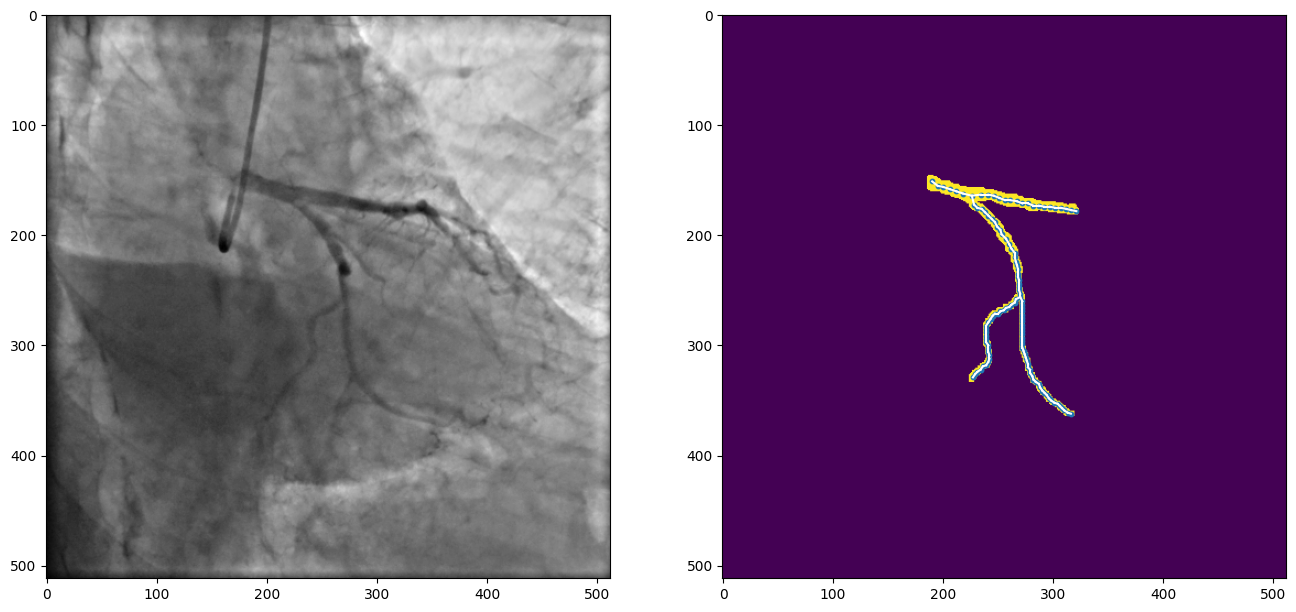

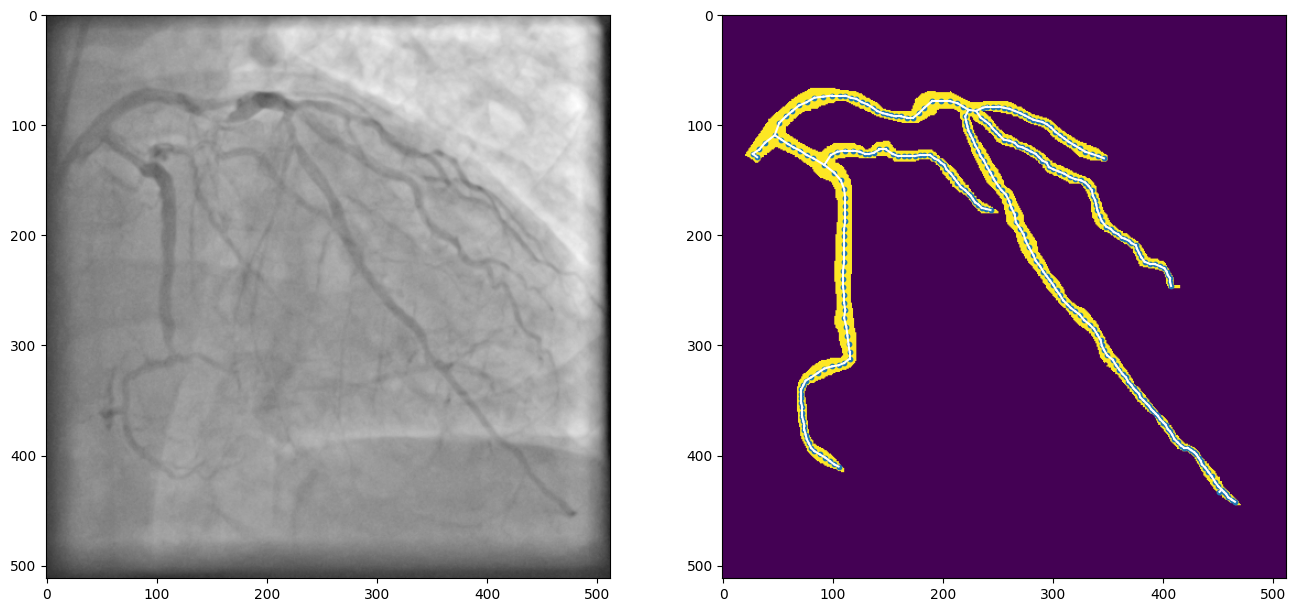

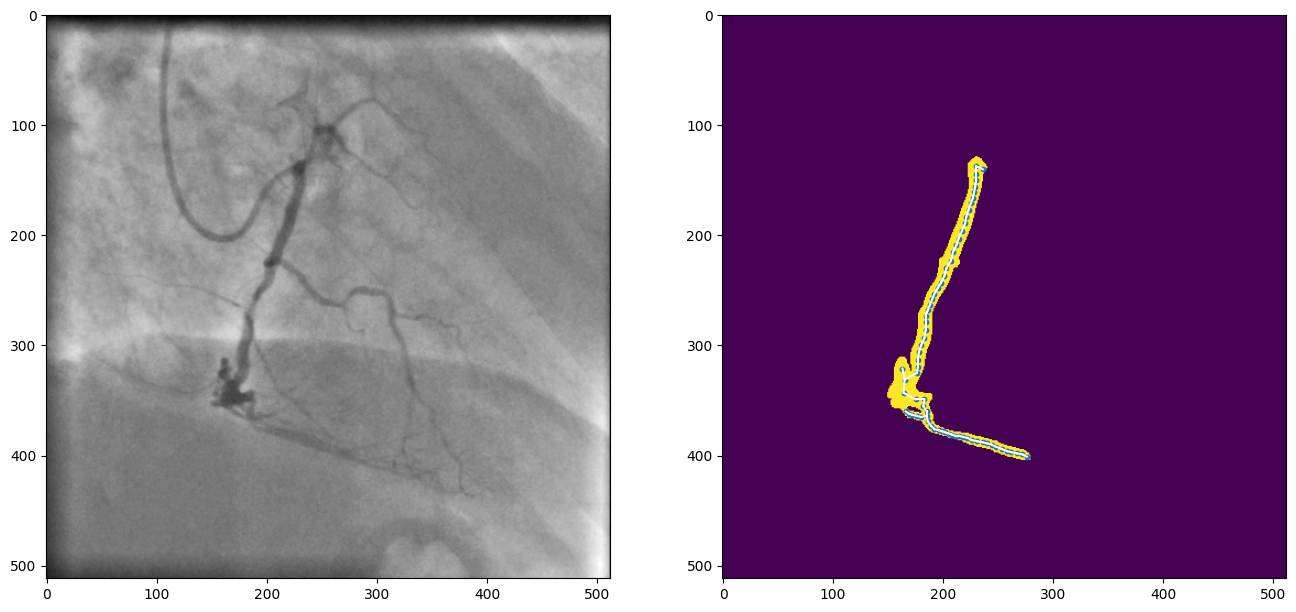

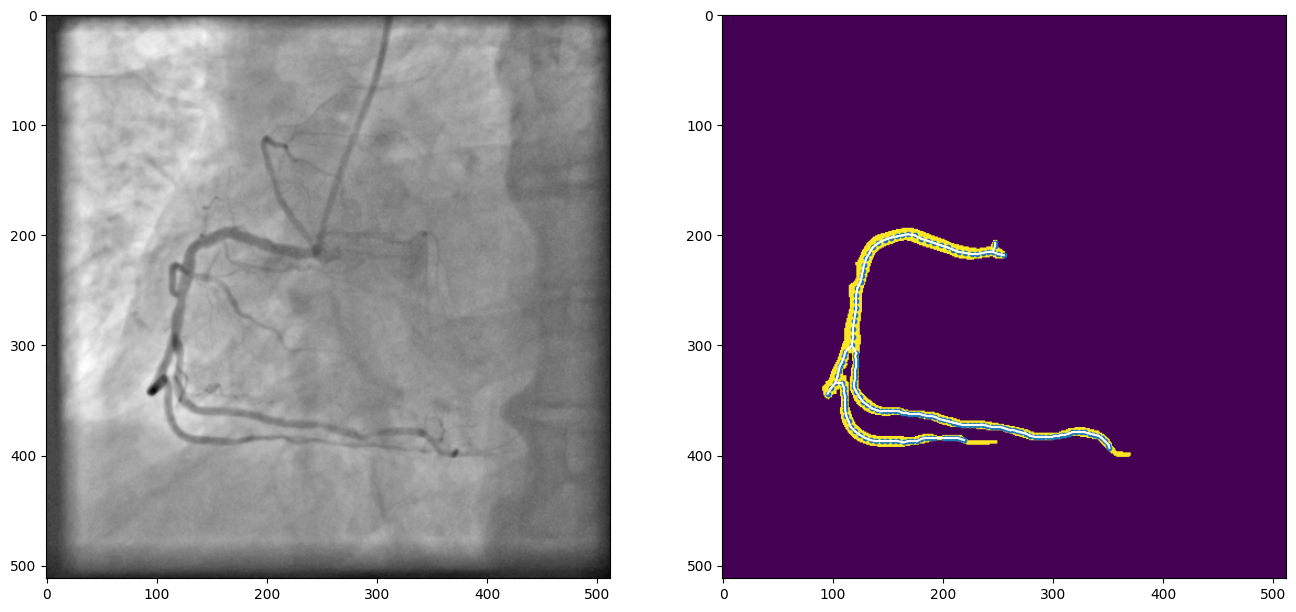

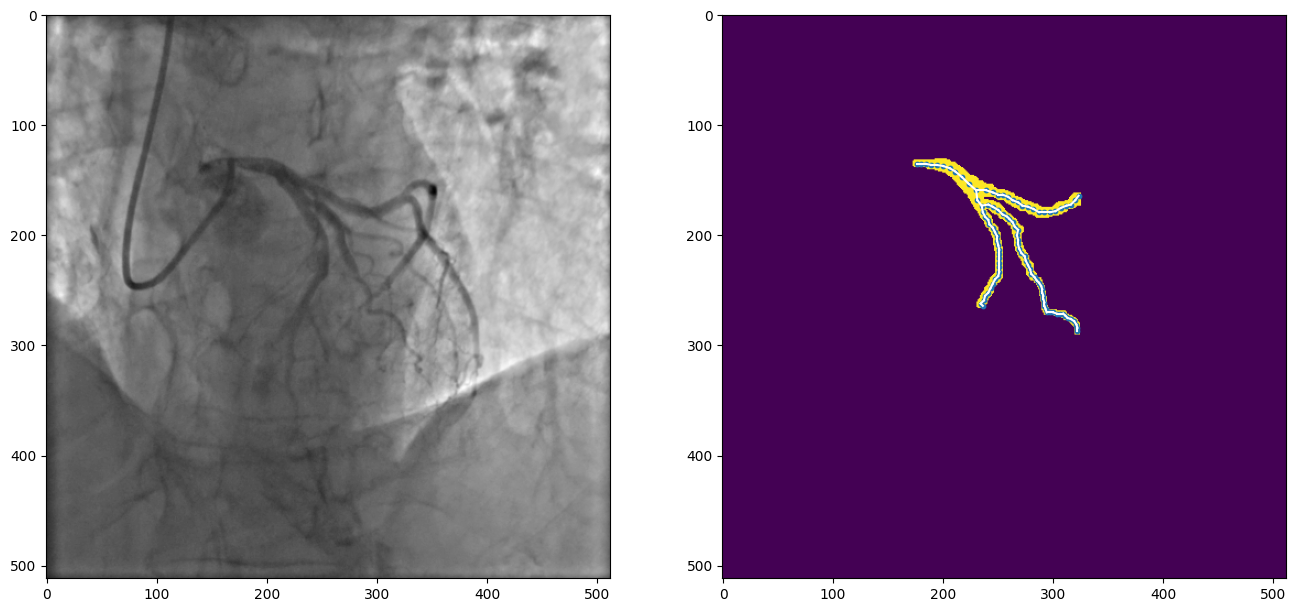

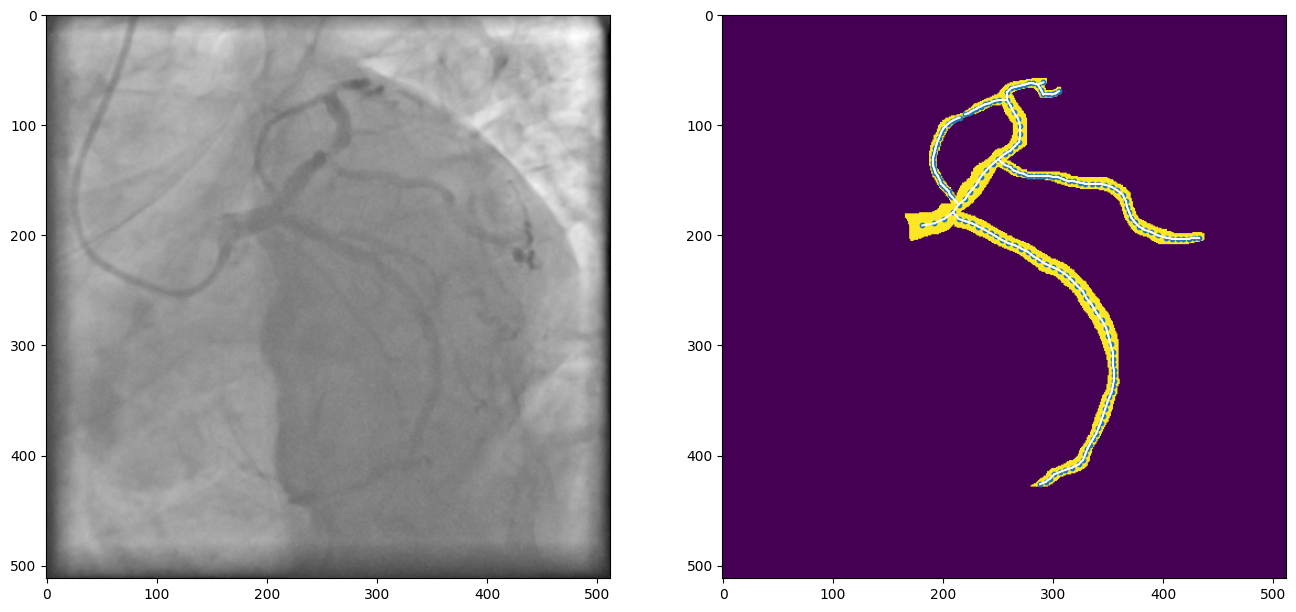

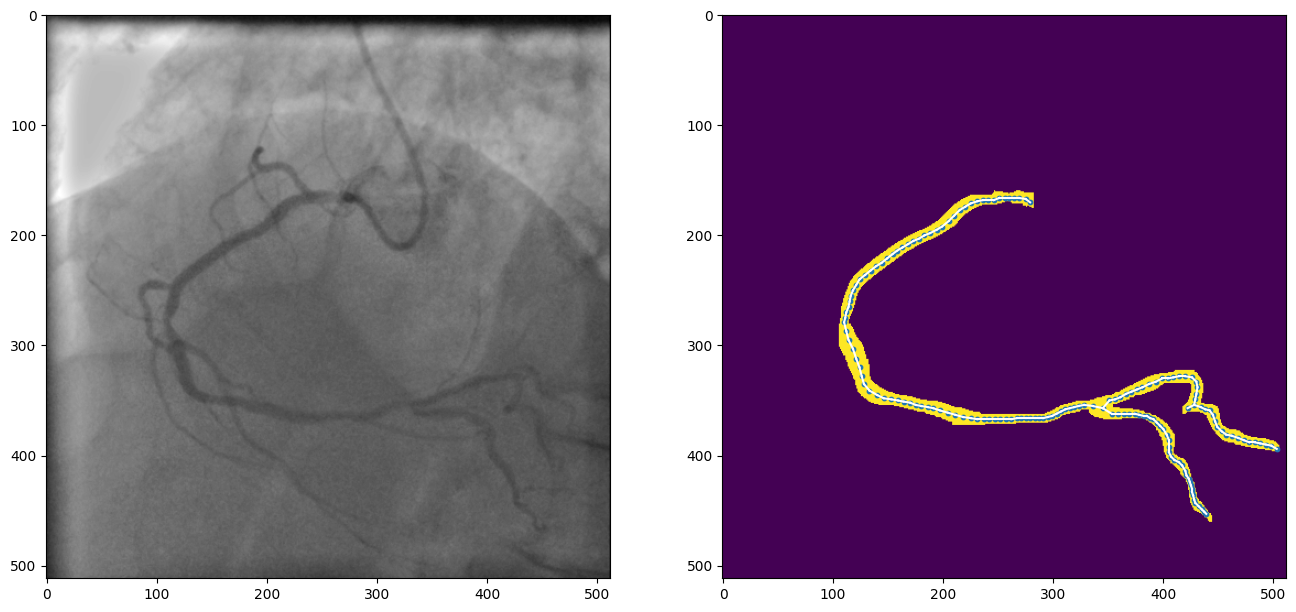

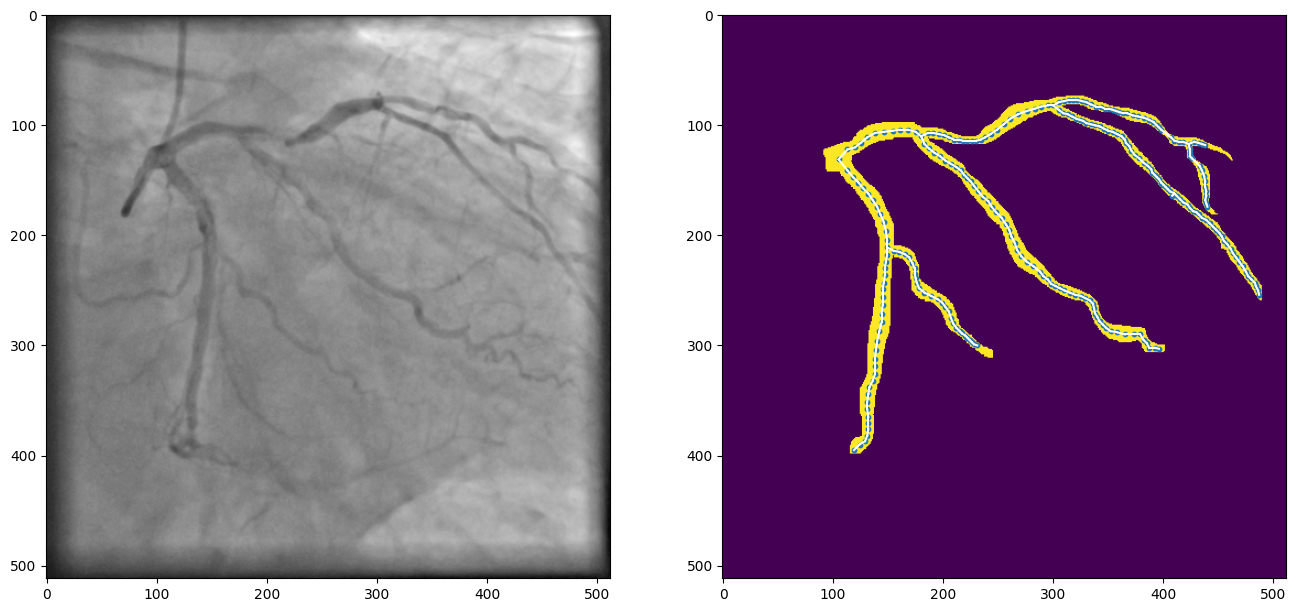

In [51]:
%matplotlib inline

for i in range(20):
    segment_dir = DATA_DIR / f"seg{i}"
    
    try:
        with open(segment_dir / "centreline.p", "rb") as f:
            centreline: nx.Graph = pickle.load(f)
            nodes = np.array(centreline.nodes)
        with open(segment_dir / 'representative_frame.p', 'rb') as f:
            scan = pickle.load(f)
    except FileNotFoundError:
        continue
            
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
    
    ax1.imshow(scan, cmap='gray')
    ax2.imshow(Image.open(segment_dir / 'segmentation.png'))
    for (x1, y1), (x2, y2) in centreline.edges:
        ax2.plot([y1, y2], [x1, x2], c='white')
    ax2.scatter(nodes[:, 1], nodes[:, 0], s=10)
    plt.show()

# File desciption

Each directory contains two files:
1. centreline.p - Pickle file containing the graph representation of the vessel.
2. representative_frame.p - Pickle file containing representative frame.
3. segmentation.png - PNG file containing binary vessel segmentation mask.

# Centreline file

In order to read the Pickle file, use the built-in pickle library in Python. You can use the following code:
```Python
import pickle

with open('centreline.p', 'rb') as file:
    vessel_graph = pickle.load(file)
```
This will get you a NetworkX ([another Python library for graph manipulation](https://networkx.org/)) graph object. The graph's nodes are points on the vessel centreline. To obtain the centreline, you will have to connect the dots :). You can do this simply and less accurately - by drawing straight lines between the nodes - or by employing some kind of an interpolation method.

The graphs were generated automatically. They were also automatically cleaned of small branches and detached segments. They can contain some erroneous nodes and edges. If you encounter any issues, please report them back. This will help me develop a better version of the algorithm.

# Representative frame
Similarly to the centreline file, this one also has to be opened via the pickle library. It contains a numpy array with the frame on top of which the vessel segmentation was performed. Read the file the same way you read the centreline file.

# Segmentation file
As mentioned above, this is a PNG file that contains a binary mask. This is the segmentation of the vessel structure. You can use matplotlib to read it into an numpy array:
```Python
import maplotlib.pyplot as plt

segmentation = plt.imread('segmentation.png')
```
The segmentations all have dimensions of 512x512 pixels and were hand-drawn by medical specialists. There is a slight chance that some masks were used for testing and do not properly depict the vessel structure. However, I did my best to eliminate them (hence the missing numbers in the 'seg' folders). I hope the data works for you!